# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


In [ ]:
gender_column = X[:, 2]
data = pd.DataFrame({'Gender': gender_column})
encoded_data = pd.get_dummies(data, columns=['Gender'])
print(encoded_data)

      Gender_Female  Gender_Male
0                 1            0
1                 1            0
2                 1            0
3                 1            0
4                 1            0
...             ...          ...
9995              0            1
9996              0            1
9997              1            0
9998              0            1
9999              1            0

[10000 rows x 2 columns]


In [ ]:
geography_column = X[:, 1]
data = pd.DataFrame({'Geography': geography_column})
encoded_data = pd.get_dummies(data, columns=['Geography'])
print(encoded_data)

      Geography_France  Geography_Germany  Geography_Spain
0                    1                  0                0
1                    0                  0                1
2                    1                  0                0
3                    1                  0                0
4                    0                  0                1
...                ...                ...              ...
9995                 1                  0                0
9996                 1                  0                0
9997                 1                  0                0
9998                 0                  1                0
9999                 1                  0                0

[10000 rows x 3 columns]


### Encoding categorical data

One Hot Encoding the "Gender" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct_1.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 619 ... 1 1 101348.88]
 [1.0 0.0 608 ... 0 1 112542.58]
 [1.0 0.0 502 ... 1 0 113931.57]
 ...
 [1.0 0.0 709 ... 0 1 42085.58]
 [0.0 1.0 772 ... 1 0 92888.52]
 [1.0 0.0 792 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
ct_2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct_2.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer



*   If we create first hidden layer, the input layer will automatically be created but the neurons in the input layer will be defined based on the input features.




In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer



*   For Binary class classification, the output layer will only need a single neuron with sigmoid activation function.



In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN



*   The Loss Function for Binary Class classification problem is "binary_crossentropy".

*   metrics mean evaluating the model. For Binary Class classification, the metrics will be accuracy.


*   the optimizer can be used "adam" or "stochastic gradient descent". Note - if we want to use stochastic gradient descent in optimizer, we have to put this "keras.optimizers.SGD(learning_rate=0.01)"


In [ ]:
from keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01)
ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set



*   batch_size means the number of samples that we want to use for one iteration to update the weights.

*   epochs mean how many iterations do we want to iterate to our model.

*   Note - 1 epoch mean one complete set of iteration for all the samples in dataset. So in the following example batch_size = 32, so to complete to run all the samples (for 1 epoch), there will be "number of sample in X_train/32 = **numbers**". that "**numbers**" will be the number of iteration for 1 epoch.






In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 90)

Epoch 1/90
250/250 [==============================] - 2s 4ms/step - loss: 0.5583 - accuracy: 0.7728
Epoch 2/90
250/250 [==============================] - 1s 3ms/step - loss: 0.4995 - accuracy: 0.7962
Epoch 3/90
250/250 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7962
Epoch 4/90
250/250 [==============================] - 1s 3ms/step - loss: 0.4783 - accuracy: 0.7962
Epoch 5/90
250/250 [==============================] - 1s 4ms/step - loss: 0.4723 - accuracy: 0.7962
Epoch 6/90
250/250 [==============================] - 1s 4ms/step - loss: 0.4673 - accuracy: 0.7970
Epoch 7/90
250/250 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7974
Epoch 8/90
250/250 [==============================] - 2s 6ms/step - loss: 0.4590 - accuracy: 0.7979
Epoch 9/90
250/250 [==============================] - 2s 9ms/step - loss: 0.4553 - accuracy: 0.7977
Epoch 10/90
250/250 [==============================] - 1s 3ms/step - loss: 0.4520 - accuracy: 0.7975

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Task - 1**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 0, 1, 600, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 163ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 192  213]]


0.8615

#Evaluating Model with CAP Curve

In [ ]:
total = len(y_test)
print(total)

class_1_count = np.sum(y_test)
print(class_1_count)

class_0_count = total - class_1_count
print(class_0_count)


2000
405
1595


63/63 [==============================] - 0s 2ms/step


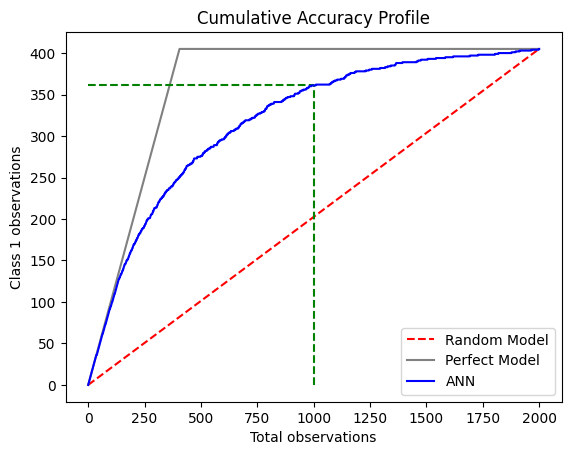

In [ ]:
# Random model
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

# Perfect Model
plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', label = 'Perfect Model')

# Point where vertical line will cut trained model
index = int((50*total / 100))

# Trained Model
probs = ann.predict(X_test)
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

# 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

# Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

# CAP Curve
plt.plot(x_values, y_values, c = 'b', label = 'ANN')
plt.title('Cumulative Accuracy Profile')
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.legend(loc = 'lower right')
plt.show()

# By using Area Under Curve

In [ ]:
from sklearn.metrics import auc
# Area under Random Model
a = auc([0, total], [0, class_1_count])

# Area between Perfect and Random Model
aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

# Area between Trained and Random Model
aR = auc(x_values, y_values) - a

print("Accuracy Rate for ANN: {}".format(aR / aP))

Accuracy Rate for ANN: 0.7184565966175162


#By using 50% Plot

In [ ]:
class_1_observed = y_values[index] * 100 / max(y_values)
print(class_1_observed)

89.1358024691358
